In [1]:
# Import libraries/modules
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

# Constants
EPOCHS = 15
OPTIMIZER = 'adam'

In [11]:
from tensorflow.python.keras.engine import training
def LoadAndNormalize(dataset):

  # Load and split data
  (train_images, train_labels), (test_images, test_labels) = dataset

  # Normalize data (so that pixel values are between 0 and 1)
  train_images = train_images / 255
  test_images = test_images / 255

  return train_images, train_labels, test_images, test_labels


In [4]:
def BuildModel():

  # Building CNN Architecture
  # Common architecture: Stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers
  model = models.Sequential()

  # Layer 1
  model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))

  # Layer 2
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))

  # Flatten 3D output to 1D
  model.add(layers.Flatten())

  # Add Dense Layers                       
  model.add(layers.Dense(64, activation='relu'))

  # CIFAR has 10 output classes  
  model.add(layers.Dense(10, activation='softmax')) 

  model.summary()

  return model                      
  

In [5]:
def TrainModel(model, train_images, train_labels, test_images, test_labels):

  # Compile and train using recommended/"default" parameters from TensorFlow (I'm not actually sure which parameters are the best for this case)
  model.compile(optimizer=OPTIMIZER, loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

  # Train model
  history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_data=(test_images, test_labels))

  return history

In [6]:
def GetModelAccuracy(model, test_images, test_labels):
  
  # Evaluate model by looking at performace on test dataset
  testLoss, testAccuracy = model.evaluate(test_images,  test_labels, verbose=2)

  # Print results
  print("Test Accuracy: ", testAccuracy)
  print("Test Loss: ", testLoss)

In [7]:
def PlotGraph(history):
  # Get training and validation loss
  trainingLoss = history.history['loss']
  trainingValLoss = history.history['val_loss']

  # Plot graph 
  plt.plot(trainingLoss)
  plt.plot(trainingValLoss)
  plt.title("Training and Validation Losses Over Epochs")
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
  plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 51s 32ms/step - loss: 1.5670 - accuracy: 0.4259 - val_loss: 1.3931 - val_accuracy: 0.4991
Epoch 2/15
1563/1563 [==============================] - 51s 32ms/step - loss: 1.2043 - accuracy: 0.5691 - val_loss: 1.1331 - val_accuracy: 0.6031
Epoch 3/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0569 - accuracy: 0.6255 - val_loss: 1.0762 - val_accuracy: 0.6268
Epoch 4/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9602 - accuracy: 0.6618 - val_loss: 0.9758 - val_accuracy: 0.6612
Epoch 5/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8906 - accuracy: 0.6892 - val_loss: 0.9269 - val_accuracy: 0.6801
Epoch 6/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8382 - accuracy: 0.7079 - val_loss: 0.8784 - val_accuracy: 0.6955
Epoch 7/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7951 - accuracy: 0.7242 - val_loss: 0.8882 - val_accura

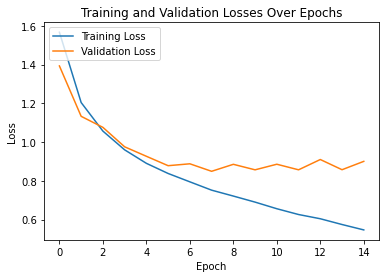

In [12]:
# Load and normalize CIFAR10 dataset
train_images, train_labels, test_images, test_labels = LoadAndNormalize(datasets.cifar10.load_data())

# Build model
model = BuildModel()

# Train model
history = TrainModel(model, train_images, train_labels, test_images, test_labels)

# Print model accuracy and loss
GetModelAccuracy(model, test_images, test_labels)

# Plot graphs
PlotGraph(history)




